In [9]:
import pandas as pd
import numpy as np

In [16]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [17]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [18]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [19]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# checking null values in the dataframe

In [22]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# checking the datadtypes of the columns

In [24]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [25]:
df.shape[0]

397

In [26]:
df.shape[1]

6

# Checking white space prasent or not

In [28]:
df.loc[df['salary']==" "]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


# Making DataFrame for the Normal data

In [30]:
df_visualization_nominal=df[['rank','discipline','sex']].copy()

In [31]:
df_visualization_nominal.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

# Visualization of the data

In [32]:
import seaborn as sns

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


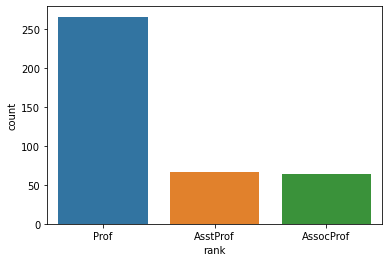

In [37]:
ax = sns.countplot(x="rank",data=df_visualization_nominal)
print(df_visualization_nominal["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


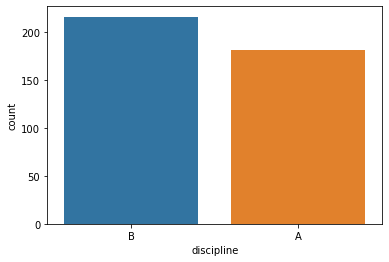

In [38]:
ax = sns.countplot(x="discipline",data=df_visualization_nominal)
print(df_visualization_nominal["discipline"].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


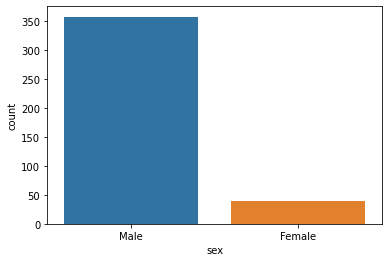

In [39]:
ax = sns.countplot(x="sex",data=df_visualization_nominal)
print(df_visualization_nominal["sex"].value_counts())

In [42]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Checking the distributi on of the continous value of the int type column

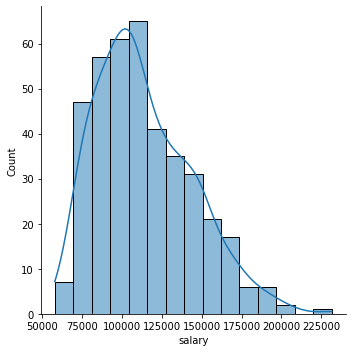

In [43]:
df_visulation_continous=df[['yrs.since.phd','salary']].copy()
sns.displot(df_visulation_continous['salary'],kde=True)

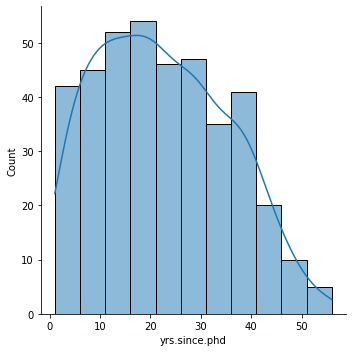

In [44]:
sns.displot(df_visulation_continous['yrs.since.phd'],kde=True)

# Encoding dataFrame

In [45]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [46]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [48]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


# Describe the dataset

In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rank,397.0,1.508816,0.757486,0.0,1.0,2.0,2.0,2.0
discipline,397.0,0.544081,0.498682,0.0,0.0,1.0,1.0,1.0
yrs.since.phd,397.0,22.314861,12.887003,1.0,12.0,21.0,32.0,56.0
yrs.service,397.0,17.614610,13.006024,0.0,7.0,16.0,27.0,60.0
sex,397.0,0.901763,0.298010,0.0,1.0,1.0,1.0,1.0
salary,397.0,113706.458438,30289.038695,57800.0,91000.0,107300.0,134185.0,231545.0


In [55]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

<AxesSubplot:>

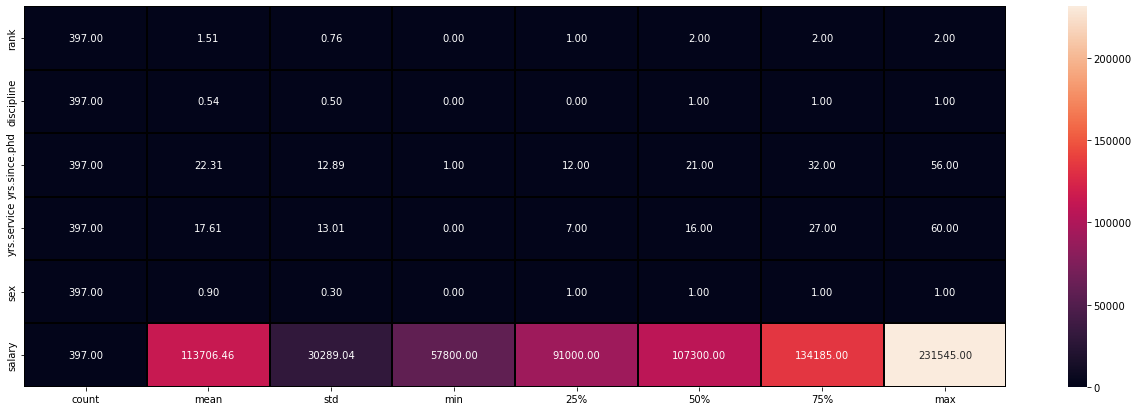

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe().transpose(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correletion of the columns with the target columns

In [63]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

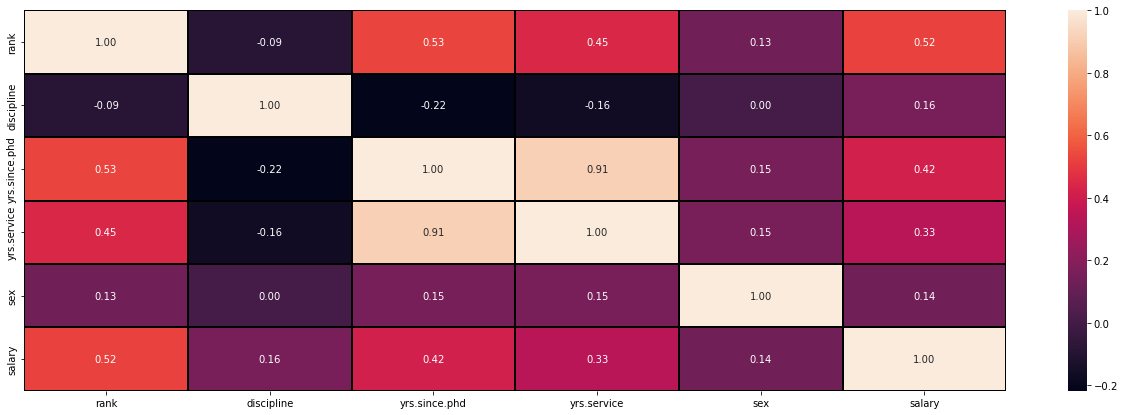

In [67]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

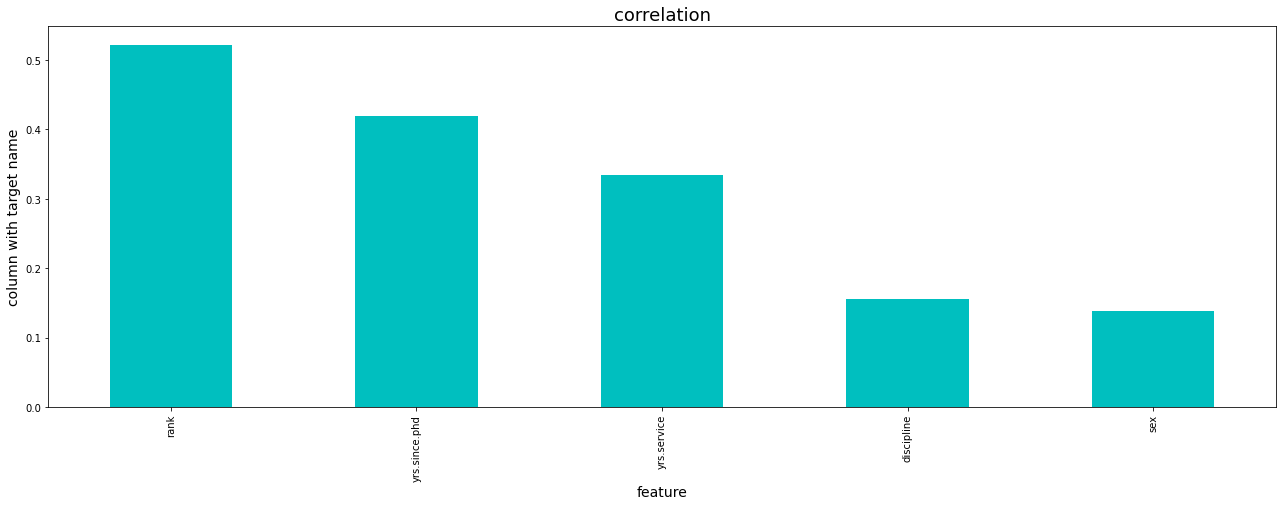

In [68]:
plt.figure(figsize=(22,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [71]:
df.skew().sort_values()

sex             -2.709958
rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

# Outliers Check

In [72]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

<AxesSubplot:>

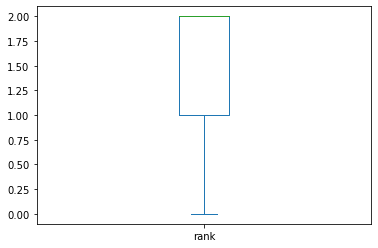

In [73]:
df['rank'].plot.box()

<AxesSubplot:>

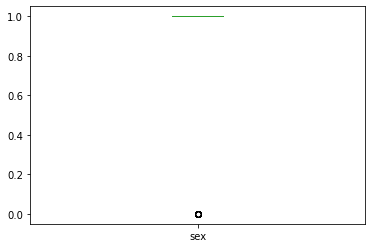

In [74]:
df['sex'].plot.box()

<AxesSubplot:>

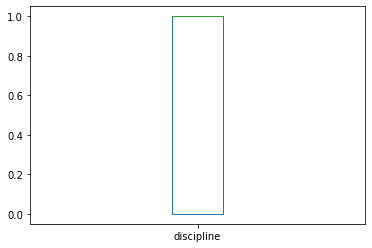

In [75]:
df['discipline'].plot.box()

<AxesSubplot:>

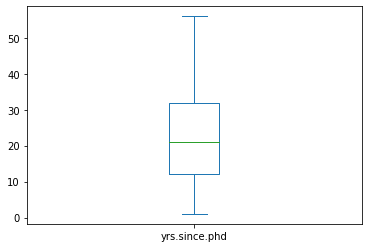

In [76]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

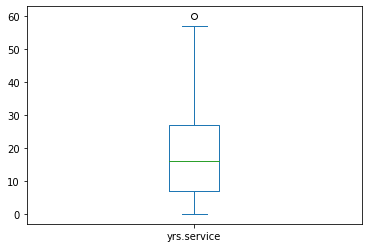

In [77]:
df['yrs.service'].plot.box()

<AxesSubplot:>

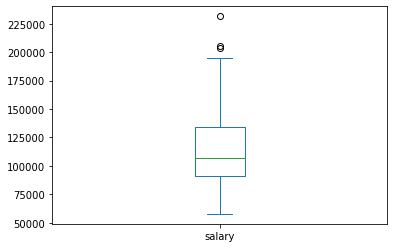

In [78]:
df['salary'].plot.box()

# Considering the outlier removal

In [79]:
df.shape

(397, 6)

In [80]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [81]:
df['sex'].unique()

array([1., 0.])

# Separeting the columns into features and target:

In [82]:
features=df.drop('salary',axis=1)
target=df['salary']

# Scalling the data using Min-Max Scaler¶

In [83]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [84]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is :-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is :-0.36119999548530757
At random state 0,the testing accuracy is :-0.40792583149752315


At random state 1,the training accuracy is :-0.3604245854198438
At random state 1,the testing accuracy is :-0.4163364187662949


At random state 2,the training accuracy is :-0.37547390964955596
At random state 2,the testing accuracy is :-0.36001895545266915


At random state 3,the training accuracy is :-0.3847313825130594
At random state 3,the testing accuracy is :-0.329352987501086


At random state 4,the training accuracy is :-0.38517450334380454
At random state 4,the testing accuracy is :-0.30440081333156155


At random state 5,the training accuracy is :-0.3950033630150771
At random state 5,the testing accuracy is :-0.2752907752774736


At random state 6,the training accuracy is :-0.3650308031752798
At random state 6,the testing accuracy is :-0.4018987080607571


At random state 7,the training accuracy is :-0.3575963886324032
At random state 7,the testin

In [85]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=80)

In [86]:
lr.fit(features_train,target_train)

LinearRegression()

In [87]:
pred_test=lr.predict(features_test)

In [88]:
print(r2_score(target_test,pred_test))

0.5086207408821506


# cross validation of the model

In [89]:
train_accuracy = r2_score(target_train,pred_train)
test_accuracy = r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,features,target,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean}and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    
    print("\n")

At cross fold2 the cv score is 0.3270801167406513and accuracy score for training is -0.42216386411302675 and accuracy for testing is 0.5086207408821506


At cross fold3 the cv score is 0.32033286730598814and accuracy score for training is -0.42216386411302675 and accuracy for testing is 0.5086207408821506


At cross fold4 the cv score is 0.3218196693768357and accuracy score for training is -0.42216386411302675 and accuracy for testing is 0.5086207408821506


At cross fold5 the cv score is 0.29569928663871764and accuracy score for training is -0.42216386411302675 and accuracy for testing is 0.5086207408821506


At cross fold6 the cv score is 0.33096341839295573and accuracy score for training is -0.42216386411302675 and accuracy for testing is 0.5086207408821506


At cross fold7 the cv score is 0.3257704419996536and accuracy score for training is -0.42216386411302675 and accuracy for testing is 0.5086207408821506


At cross fold8 the cv score is 0.33100605845135816and accuracy score for 

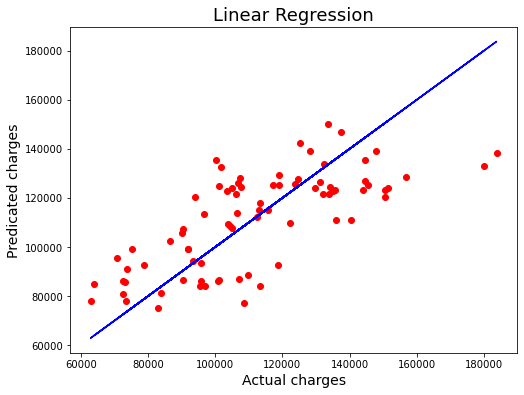

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicated charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [92]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001,.001,.01,.1,1,10],
              'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [93]:
# final model training
las = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

34.89174595002764

In [94]:
pred_ls=ls.predict(features_test)

In [95]:
lss=r2_score(target_test,pred_test)

In [96]:
lss*100

50.86207408821506

In [97]:
cv_score=cross_val_score(ls,features,target,cv=6)
cv_mean=cv_score.mean()
cv_mean*100

33.096312716799694

# Ensemble technique

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [100]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print('R2_score',rfs*100)
rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)


R2_score 37.32223702919482
cross_val_score: 27.589551931524824


In [101]:
import pickle
filename='salary.pkl'
pickle.dump(rf,open(filename,'wb'))

# conclusion:-

In [103]:
loaded_model=pickle.load(open('salary.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result*100)

37.32223702919482


In [108]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['predicted','orginal'])

In [110]:
conclusion.transpose()

,predicted,orginal
0,153893.795,153893.795
1,123877.000,123877.000
2,113069.880,113069.880
3,103547.895,103547.895
4,126737.865,126737.865
...,...,...
75,177367.875,177367.875
76,145702.070,145702.070
77,84747.030,84747.030
78,96904.655,96904.655
